In [79]:
# initial imports 
import pandas as pd
import datetime as dt

In [80]:
# importing the CSV 
mobility_data = pd.read_csv('2020_US_Region_Mobility_Report.csv', index_col = 'date', parse_dates = True, infer_datetime_format = True)

In [81]:
# seeing the data 
mobility_data.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
date,,,,,,,,,,,,,
2020-02-15,US,United States,NaN,NaN,NaN,NaN,NaN,6.0,2.0,15.0,3.0,2.0,-1.0
2020-02-16,US,United States,NaN,NaN,NaN,NaN,NaN,7.0,1.0,16.0,2.0,0.0,-1.0
2020-02-17,US,United States,NaN,NaN,NaN,NaN,NaN,6.0,0.0,28.0,-9.0,-24.0,5.0
2020-02-18,US,United States,NaN,NaN,NaN,NaN,NaN,0.0,-1.0,6.0,1.0,0.0,1.0
2020-02-19,US,United States,NaN,NaN,NaN,NaN,NaN,2.0,0.0,8.0,1.0,1.0,0.0


In [82]:
len(mobility_data)

879637

In [83]:
# replacing all empty sub-regions which represent the entire US with code 'ALL'
mobility_data['sub_region_1'].fillna(value ='ALL', inplace=True)

In [84]:
mobility_data.drop(columns=[
    'country_region_code',
    'metro_area','census_fips_code',
    'country_region_code',
    'transit_stations_percent_change_from_baseline',
    'iso_3166_2_code',
    'parks_percent_change_from_baseline',
    'residential_percent_change_from_baseline'], 
    inplace = True)

In [85]:
import numpy as np

In [86]:
nan_filter = mobility_data["sub_region_2"].isna()

In [87]:
mobility_data = mobility_data[nan_filter]


In [88]:
# resetting index
mobility_data.reset_index()

,date,country_region,sub_region_1,sub_region_2,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,workplaces_percent_change_from_baseline
0,2020-02-15,United States,ALL,NaN,6.0,2.0,2.0
1,2020-02-16,United States,ALL,NaN,7.0,1.0,0.0
2,2020-02-17,United States,ALL,NaN,6.0,0.0,-24.0
3,2020-02-18,United States,ALL,NaN,0.0,-1.0,0.0
4,2020-02-19,United States,ALL,NaN,2.0,0.0,1.0
...,...,...,...,...,...,...,...
18039,2021-01-22,United States,Wyoming,NaN,-22.0,-11.0,-12.0
18040,2021-01-23,United States,Wyoming,NaN,-26.0,-15.0,-12.0
18041,2021-01-24,United States,Wyoming,NaN,-22.0,-18.0,-13.0
18042,2021-01-25,United States,Wyoming,NaN,-19.0,-10.0,-17.0


In [89]:
# Renaming columns 
mobility_data = mobility_data.rename(
    columns ={
    'retail_and_recreation_percent_change_from_baseline':'Retail and Recreation',
    'grocery_and_pharmacy_percent_change_from_baseline':'Grocery and Pharmacy',
    'workplaces_percent_change_from_baseline': 'Workplaces',
    'sub_region_1':'State'}) 

In [90]:
#seeing the data 
mobility_data.tail()

,country_region,State,sub_region_2,Retail and Recreation,Grocery and Pharmacy,Workplaces
date,,,,,,
2021-01-22,United States,Wyoming,NaN,-22.0,-11.0,-12.0
2021-01-23,United States,Wyoming,NaN,-26.0,-15.0,-12.0
2021-01-24,United States,Wyoming,NaN,-22.0,-18.0,-13.0
2021-01-25,United States,Wyoming,NaN,-19.0,-10.0,-17.0
2021-01-26,United States,Wyoming,NaN,-20.0,-13.0,-16.0


In [91]:
import hvplot.pandas 

In [92]:
mobility_data.hvplot.line(x ='date', y ='Retail and Recreation', groupby ='State')

:DynamicMap   [State]
   :Curve   [date]   (Retail and Recreation)

<AxesSubplot:title={'center':'Average Per Cent Change of Travel for Retail and Recreation'}, xlabel='State', ylabel='Average Per Cent Change'>

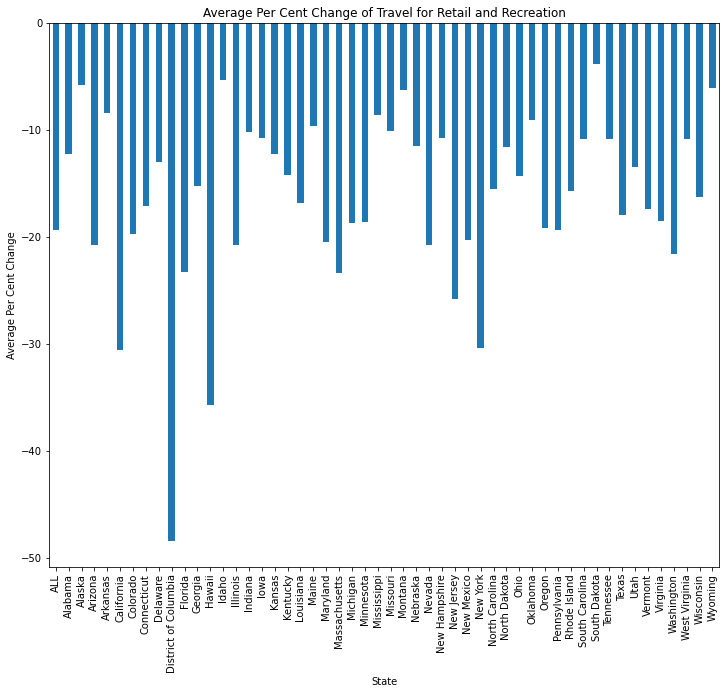

In [96]:
mobility_mean = mobility_data.groupby("State")['Retail and Recreation'].mean()
mobility_mean.plot(
    kind='bar', 
    figsize = (12,10), 
    ylabel = 'Average Per Cent Change',
    title= 'Average Per Cent Change of Travel for Retail and Recreation'
    )

In [97]:
# seperating US - ALL to plot with stock data 
US_ALL = mobility_data.loc[mobility_data.State == 'ALL','Retail and Recreation']

In [98]:
US_ALL.isna().sum()

0

In [99]:
## adding the stock data to mobility
# initial imports 
import os
import quandl 
import alpaca_trade_api as tradeapi
from dotenv import load_dotenv
import plotly.express as px
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")



In [100]:
type(alpaca_api_key)

str

In [101]:
load_dotenv()

True

In [102]:
# creating an alpaca object 
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [103]:
import pandas_datareader as pdr
import hvplot.pandas
import datetime as dt

In [105]:
## creating the variables needed to pull stock data 
tickers = ['ETSY', 'M', 'CPPRQ','AMZN', 'WMT', 'PRTY']
# matching my start and end dates with the mobility data so it can align 
start_date = pd.Timestamp("2020-02-15", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-01-26", tz="America/New_York").isoformat() # matching my start and end dates with the mobility data so it can align 
timeframe = "1D"


In [107]:
stock_prices = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# need to remove time from index 
stock_prices.index = stock_prices.index.date
# need to sort index 
stock_prices.sort_index()
stock_prices.tail()

AMZN                                       CPPRQ            \
                open     high        low    close   volume  open high  low   
2021-01-20  3181.990  3279.80  3175.0000  3264.73  4777430   NaN  NaN  NaN   
2021-01-21  3293.000  3348.55  3289.5674  3307.21  4330235   NaN  NaN  NaN   
2021-01-22  3304.310  3321.91  3283.1643  3290.00  2377222   NaN  NaN  NaN   
2021-01-25  3328.500  3363.89  3243.1462  3293.10  3353964   NaN  NaN  NaN   
2021-01-26  3296.356  3338.00  3282.8700  3326.12  2616245   NaN  NaN  NaN   

                         ...  PRTY                                  WMT  \
           close volume  ...  open  high    low  close   volume    open   
2021-01-20   NaN    NaN  ...  6.62  7.13  6.620  7.035  3846314  143.59   
2021-01-21   NaN    NaN  ...  6.99  7.50  6.830  7.100  3325714  145.36   
2021-01-22   NaN    NaN  ...  7.00  7.46  6.885  7.455  3053355  145.60   
2021-01-25   NaN    NaN  ...  7.53  7.89  7.170  7.420  3438233  145.36   
2021-01-26   NaN    NaN  ...  7.46  7.50  7.160  7.270  2511214  145.63   

                                             
              high     low   close   volume  
2021-01-20  145.66  142.89  145.46  7145243  
2021-01-21  145.73  144.21  144.87  4140510  
2021-01-22  147.34  145.12  146.30  5616751  
2021-01-25  146.25  144.27  146.24  5906792  
2021-01-26  147.81  145.47  147.52  4622439  

[5 rows x 30 columns]

In [108]:
# looking at my data 
#type(stock_prices) #dataframe -- helps me identify how to put the information together 


In [109]:
# getting all the closing prices and putting them into an empty dataframe
close_prices = pd.DataFrame()

close_prices["AMZN"] = stock_prices["AMZN"]["close"]
close_prices["CPPRQ"] = stock_prices["CPPRQ"]["close"]
close_prices["PRTY"] = stock_prices["PRTY"]["close"]
close_prices['WMT'] = stock_prices["WMT"]["close"]
close_prices['ETSY'] = stock_prices['ETSY']["close"]
close_prices['M'] = stock_prices['M']["close"]


In [111]:
close_prices.hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [112]:
close_prices.tail()

,AMZN,CPPRQ,PRTY,WMT,ETSY,M
2021-01-20,3264.73,NaN,7.035,145.46,215.80,12.34
2021-01-21,3307.21,NaN,7.100,144.87,212.54,12.32
2021-01-22,3290.00,NaN,7.455,146.30,213.59,12.89
2021-01-25,3293.10,NaN,7.420,146.24,208.94,14.28
2021-01-26,3326.12,NaN,7.270,147.52,204.42,15.85


In [113]:
close_prices.count()

AMZN     238
CPPRQ      0
PRTY     238
WMT      238
ETSY     238
M        238
dtype: int64

In [114]:
US_ALL.rename('US Mobility Daily Per Cent Change')

date
2020-02-15     6.0
2020-02-16     7.0
2020-02-17     6.0
2020-02-18     0.0
2020-02-19     2.0
              ... 
2021-01-22   -26.0
2021-01-23   -25.0
2021-01-24   -28.0
2021-01-25   -28.0
2021-01-26   -28.0
Name: US Mobility Daily Per Cent Change, Length: 347, dtype: float64

In [115]:
US_ALL.head()

date
2020-02-15    6.0
2020-02-16    7.0
2020-02-17    6.0
2020-02-18    0.0
2020-02-19    2.0
Name: Retail and Recreation, dtype: float64

In [116]:
type(US_ALL)

pandas.core.series.Series

In [117]:
# converting series to df 
df = pd.DataFrame(US_ALL)

In [118]:
df

,Retail and Recreation
date,
2020-02-15,6.0
2020-02-16,7.0
2020-02-17,6.0
2020-02-18,0.0
2020-02-19,2.0
...,...
2021-01-22,-26.0
2021-01-23,-25.0
2021-01-24,-28.0


In [119]:
# now i need to merge this data with my mobiltiy data 
stock_mobility = pd.concat([df,close_prices],axis = 1, join = 'inner')

In [120]:
stock_mobility.columns

Index(['Retail and Recreation', 'AMZN', 'CPPRQ', 'PRTY', 'WMT', 'ETSY', 'M'], dtype='object')

In [121]:
# changing the column name
stock_mobility.rename(columns={'Retail and Recreation': 'US Retail Mobility '}, inplace = True)

In [122]:
stock_mobility

,US Retail Mobility,AMZN,CPPRQ,PRTY,WMT,ETSY,M
2020-02-18,0.0,2155.67,NaN,2.750,119.66,53.34,16.070
2020-02-19,2.0,2170.21,NaN,2.830,117.68,53.17,16.295
2020-02-20,1.0,2153.59,NaN,2.970,117.68,54.40,16.630
2020-02-21,2.0,2095.97,NaN,2.970,118.59,53.72,16.220
2020-02-24,2.0,2008.74,NaN,2.730,116.34,51.36,15.440
...,...,...,...,...,...,...,...
2021-01-20,-26.0,3264.73,NaN,7.035,145.46,215.80,12.340
2021-01-21,-26.0,3307.21,NaN,7.100,144.87,212.54,12.320
2021-01-22,-26.0,3290.00,NaN,7.455,146.30,213.59,12.890
2021-01-25,-28.0,3293.10,NaN,7.420,146.24,208.94,14.280


In [123]:
# resetting the index
stock_mobility.reset_index(inplace=True)

In [130]:
##
stock_mobility = stock_mobility.set_index('index')

KeyError: "None of ['index'] are in the columns"

In [131]:
stock_mobility

,US Retail Mobility,AMZN,CPPRQ,PRTY,WMT,ETSY,M
index,,,,,,,
2020-02-18,0.0,2155.67,NaN,2.750,119.66,53.34,16.070
2020-02-19,2.0,2170.21,NaN,2.830,117.68,53.17,16.295
2020-02-20,1.0,2153.59,NaN,2.970,117.68,54.40,16.630
2020-02-21,2.0,2095.97,NaN,2.970,118.59,53.72,16.220
2020-02-24,2.0,2008.74,NaN,2.730,116.34,51.36,15.440
...,...,...,...,...,...,...,...
2021-01-20,-26.0,3264.73,NaN,7.035,145.46,215.80,12.340
2021-01-21,-26.0,3307.21,NaN,7.100,144.87,212.54,12.320
2021-01-22,-26.0,3290.00,NaN,7.455,146.30,213.59,12.890


In [132]:
## dropping the null values to account for missing weekends in the stock data 
stock_mobility.count()

US Retail Mobility     238
AMZN                   238
CPPRQ                    0
PRTY                   238
WMT                    238
ETSY                   238
M                      238
dtype: int64

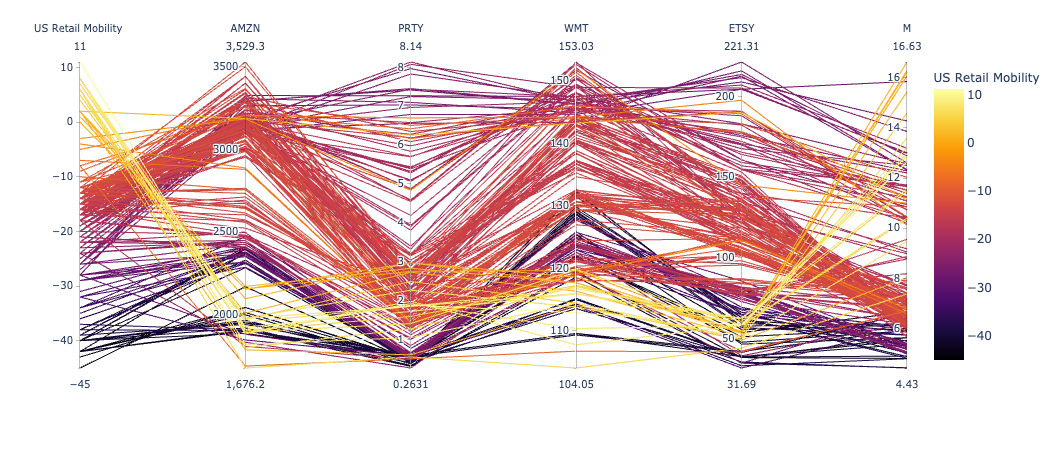

In [134]:

# Create Parallel Coordinates plot
px.parallel_coordinates(
    stock_mobility,
    dimensions = ['US Retail Mobility ','AMZN','CPPRQ','PRTY','WMT','ETSY','M'],
    color_continuous_scale=px.colors.sequential.Inferno,
    color ='US Retail Mobility '
 )

In [135]:
import seaborn as sns
# corrlation matrix
stock_mobility_corr =stock_mobility.corr()
stock_mobility_corr

,US Retail Mobility,AMZN,PRTY,WMT,ETSY,M
US Retail Mobility,1.000000,0.129955,0.151018,-0.050484,0.115436,0.428755
AMZN,0.129955,1.000000,0.578347,0.831985,0.856468,0.057927
PRTY,0.151018,0.578347,1.000000,0.718615,0.854977,0.718362
WMT,-0.050484,0.831985,0.718615,1.000000,0.846891,0.225931
ETSY,0.115436,0.856468,0.854977,0.846891,1.000000,0.383033
M,0.428755,0.057927,0.718362,0.225931,0.383033,1.000000


<AxesSubplot:>

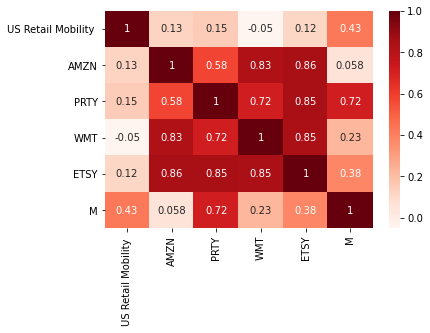

In [136]:
## illustrates mobility vs. stocks 
sns.heatmap(stock_mobility_corr,annot=True, cmap ='Reds')

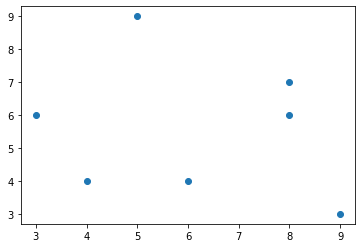

In [137]:
# NO  
#trying to plot a scatter plot of stock_mobility
# might be good for two stocks 
from  matplotlib import pyplot as plt
x=[9,8,5,4,3,6,8]
y=[3,6,9,4,6,4,7]

plt.scatter(x,y)
plt.show()

<AxesSubplot:>

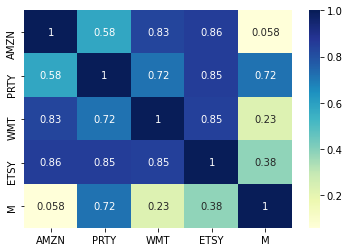

In [72]:
# plotting a correlation matrix for close prices 
close_prices_corr = close_prices.corr()
close_prices_corr
# plotting 
sns.heatmap(close_prices_corr,annot=True, cmap ='YlGnBu')